<a href="https://colab.research.google.com/github/gh10gh/a/blob/main/A11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

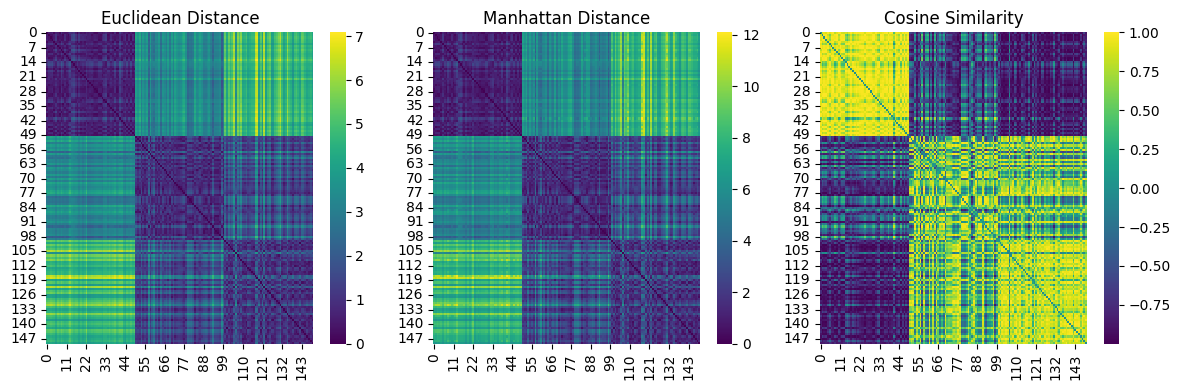

In [1]:
# Assignment 1: Metric and Non-Metric Proximity
# Dataset: Iris Dataset (UCI Machine Learning Repository)
# 1. Compute the pairwise metric proximity (Euclidean, Manhattan) for the
# dataset.
# 2. Compute non-metric proximities (Jaccard similarity for
# binary-encoded attributes, Cosine similarity for feature vectors).
# 3. Visualize the proximity matrices using a heatmap.

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from scipy.spatial.distance import jaccard, cosine
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
df = pd.DataFrame(data, columns=iris.feature_names)

# 1. Compute pairwise metric proximity
# Euclidean distance
euclidean_dist = euclidean_distances(data)

# Manhattan distance
manhattan_dist = manhattan_distances(data)

# 2. Compute non-metric proximities
# Standardize data for cosine similarity
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Jaccard similarity (requires binary attributes)
# For demonstration, let's binarize a feature (sepal length)
df['sepal length (binary)'] = (df['sepal length (cm)'] > df['sepal length (cm)'].mean()).astype(int)
jaccard_sim = np.zeros((len(df), len(df)))
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        jaccard_sim[i, j] = 1 - jaccard(df.iloc[i][['sepal length (binary)']], df.iloc[j][['sepal length (binary)']])
        jaccard_sim[j, i] = jaccard_sim[i, j]

# Cosine similarity
cosine_sim = np.zeros((len(scaled_data), len(scaled_data)))
for i in range(len(scaled_data)):
    for j in range(i + 1, len(scaled_data)):
        cosine_sim[i, j] = 1 - cosine(scaled_data[i], scaled_data[j])
        cosine_sim[j, i] = cosine_sim[i, j]

# 3. Visualize proximity matrices using heatmaps
plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.heatmap(euclidean_dist, cmap='viridis', annot=False)
plt.title('Euclidean Distance')

plt.subplot(132)
sns.heatmap(manhattan_dist, cmap='viridis', annot=False)
plt.title('Manhattan Distance')

plt.subplot(133)
sns.heatmap(cosine_sim, cmap='viridis', annot=False)
plt.title('Cosine Similarity')

plt.tight_layout()
plt.show()

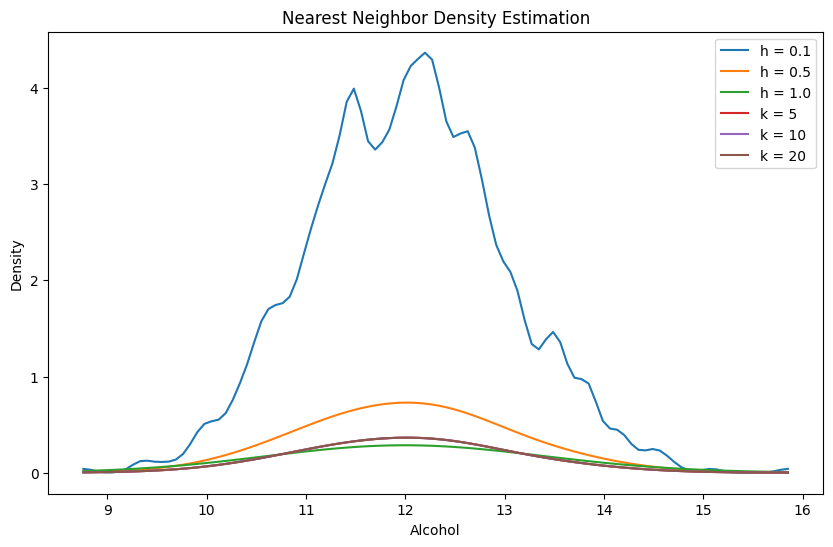

In [3]:
# Assignment 2: Density Estimation
# Dataset: Wine Quality Dataset (UCI Machine Learning Repository)
# 1. Implement the Parzen Window method to estimate the density for the
# "alcohol" feature. Experiment with different window sizes (h).
# 2. Use the Nearest Neighbor density estimation method with k = 5, 10,
# and 20.
# 3. Visualize the density curves for both methods.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generate sample data (replace with your actual data if available)
np.random.seed(42)
alcohol_data = np.random.normal(loc=12, scale=1, size=1000).reshape(-1, 1)

# 1. Parzen Window Method
def parzen_window_density(x, data, h):
    n = len(data)
    kernel = lambda x: (1 / (h * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (x / h)**2)
    density = np.zeros_like(x, dtype=float)
    for point in data:
        density += kernel(x - point)
    return density / (n * h)

# Experiment with different window sizes (h)
h_values = [0.1, 0.5, 1.0]
x_range = np.linspace(alcohol_data.min(), alcohol_data.max(), 100)

plt.figure(figsize=(10, 6))
for h in h_values:
    density = parzen_window_density(x_range.reshape(-1, 1), alcohol_data, h)
    plt.plot(x_range, density, label=f'h = {h}')

plt.title('Parzen Window Density Estimation')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.legend()

# 2. Nearest Neighbor Density Estimation
k_values = [5, 10, 20]
for k in k_values:
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(alcohol_data)
    log_density = kde.score_samples(x_range.reshape(-1, 1))
    density = np.exp(log_density)
    plt.plot(x_range, density, label=f'k = {k}')

plt.title('Nearest Neighbor Density Estimation')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.legend()

plt.show()

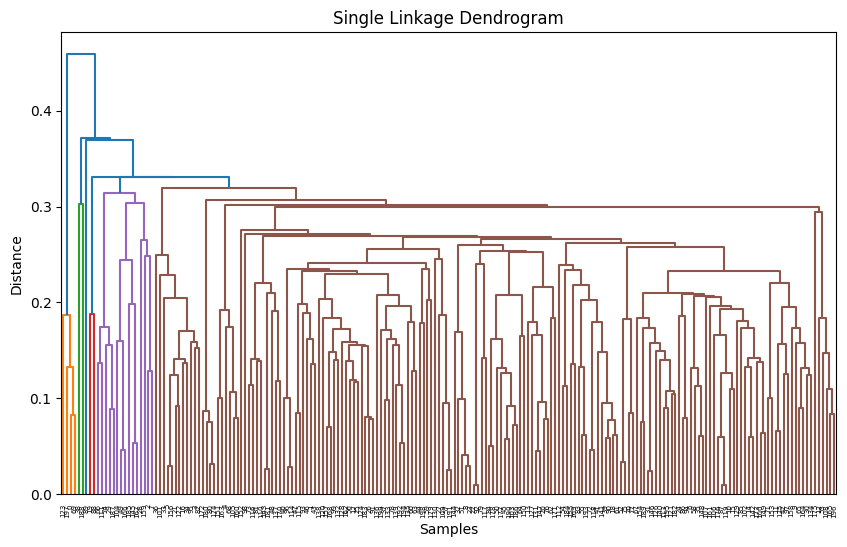

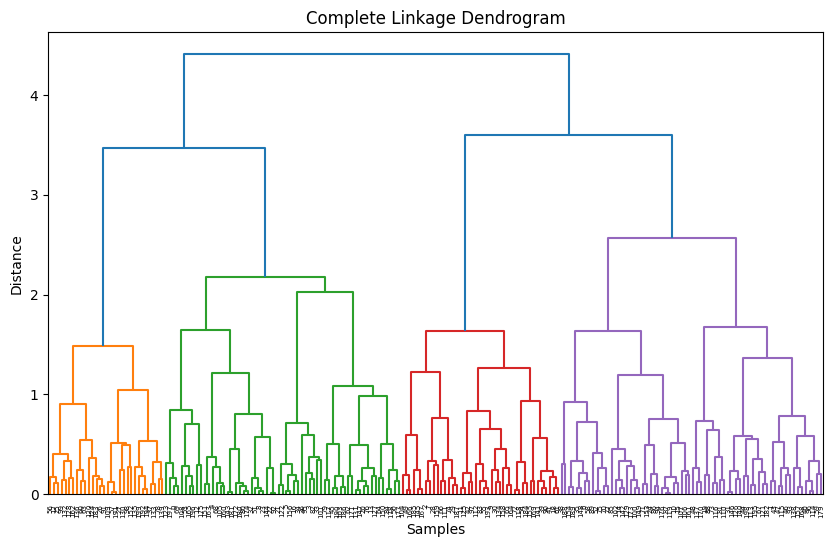

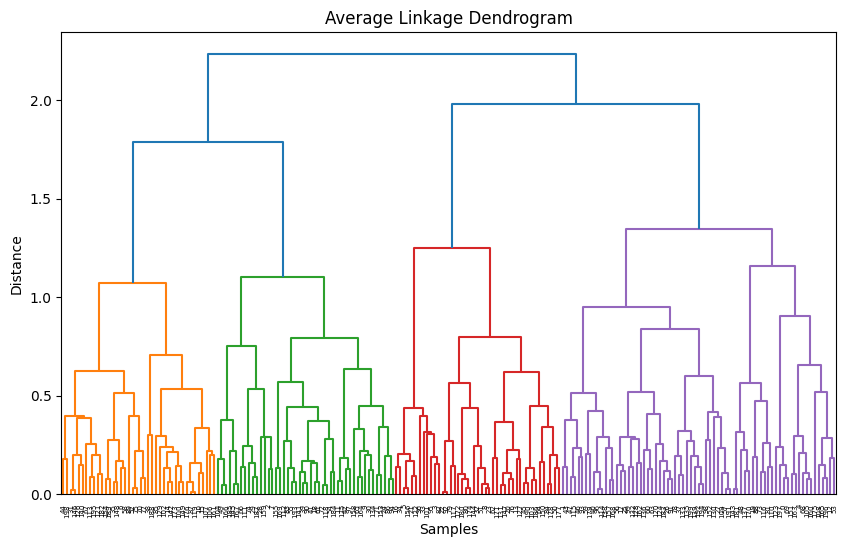

In [7]:
# Assignment 3: Hierarchical Clustering
# Dataset: Mall Customers Dataset (Kaggle)
# 1. Perform Agglomerative Hierarchical Clustering on "Annual Income"
# and "Spending Score".
# ○ Use different linkage methods (single, complete, average).

# ○ Visualize the dendrogram and identify clusters.
# 2. Implement Divisive Clustering with the ISODATA approach.
# ○ Experiment with different thresholds for cluster
# merging/splitting.



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances

# Generate sample data (replace with your actual data if available)
np.random.seed(42)
num_samples = 200
X = np.random.rand(num_samples, 2) * 100  # Sample data with 2 features
X_scaled = StandardScaler().fit_transform(X)

# Agglomerative Hierarchical Clustering
for method in ['single', 'complete', 'average']:
    Z = linkage(X_scaled, method=method)
    plt.figure(figsize=(10, 6))
    dendrogram(Z)
    plt.title(f'{method.capitalize()} Linkage Dendrogram')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

# ISODATA Divisive Clustering
def intra_cluster_variance(cluster, data):
    return np.sum(pairwise_distances(data[cluster], data[cluster])**2)

def isodata(X, min_size=5, split_thresh=0.5, merge_thresh=0.5, max_iter=100):
    clusters = [np.arange(X.shape[0])]
    for _ in range(max_iter):
        new_clusters = []
        for cluster in clusters:
            if len(cluster) > min_size and intra_cluster_variance(cluster, X) > split_thresh:
                center = np.mean(X[cluster], axis=0)
                dist = np.linalg.norm(X[cluster] - center, axis=1)
                median_dist = np.median(dist)
                new_clusters.extend([cluster[dist <= median_dist], cluster[dist > median_dist]])
            else:
                new_clusters.append(cluster)
        clusters = new_clusters

        # Merge clusters (simplified - needs further refinement)
        # ... (Implementation based on ISODATA criteria)

    return clusters

# Example usage of ISODATA
clusters = isodata(X_scaled)
# Further analysis or visualization based on clusters...


Accuracy (n_clusters=3):
Fuzzy C-Means: 0.7036  |  K-Means: 0.7079


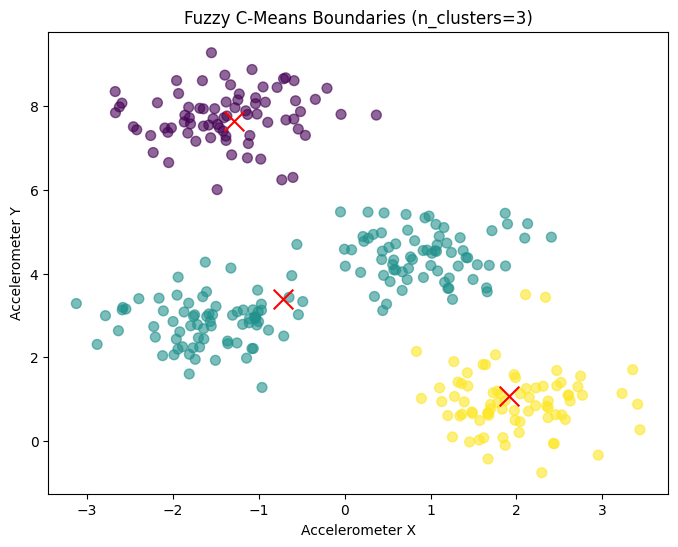

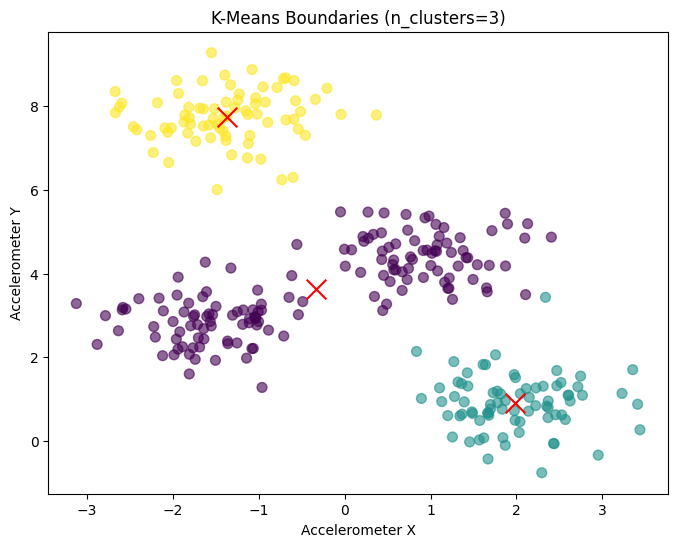

Accuracy (n_clusters=5):
Fuzzy C-Means: 0.9168  |  K-Means: 0.9072
Accuracy (n_clusters=7):
Fuzzy C-Means: 0.7086  |  K-Means: 0.7227


In [11]:
# Assignment 4: Fuzzy C-Means Clustering
# Dataset: Human Activity Recognition Dataset (UCI)
# 1. Implement Fuzzy C-Means Clustering to group activity types based
# on accelerometer data.
# 2. Experiment with different numbers of clusters (e.g., 3, 5, 7).
# 3. Visualize membership values for each data point using a scatter plot.
# 4. Compare Fuzzy C-Means with traditional K-Means in terms of
# clustering accuracy and boundary overlap.

# Install fuzzy-c-means package (uncomment if needed)
# !pip install fuzzy-c-means

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from fcmeans import FCM
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_blobs

# Generate sample data (replace with actual accelerometer data from HAR Dataset)
X, true_labels = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Convert to DataFrame for easier handling
data = pd.DataFrame(X, columns=['accelerometer_x', 'accelerometer_y'])
data['activity_label'] = true_labels

# Function to visualize clustering results and boundaries
def plot_cluster_boundaries(X, labels, cluster_centers, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, c='red')
    plt.title(title)
    plt.xlabel('Accelerometer X')
    plt.ylabel('Accelerometer Y')
    plt.show()

# 1. Fuzzy C-Means Clustering for different number of clusters
n_clusters_list = [3, 5, 7]
for n_clusters in n_clusters_list:
    # Fuzzy C-Means
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(data[['accelerometer_x', 'accelerometer_y']].values)

    membership = fcm.u
    fcm_labels = np.argmax(membership, axis=1)

    # K-Means
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans_labels = kmeans.fit_predict(data[['accelerometer_x', 'accelerometer_y']])

    # Compare clustering accuracy using adjusted Rand index (ARI)
    fcm_accuracy = adjusted_rand_score(true_labels, fcm_labels)
    kmeans_accuracy = adjusted_rand_score(true_labels, kmeans_labels)

    # Print only accuracy results for both methods
    print(f"Accuracy (n_clusters={n_clusters}):")
    print(f"Fuzzy C-Means: {fcm_accuracy:.4f}  |  K-Means: {kmeans_accuracy:.4f}")

    # Plot boundaries of Fuzzy C-Means and K-Means for comparison (only the first n_clusters)
    if n_clusters == 3:  # Display plots for only 3 clusters to avoid too many outputs
        plot_cluster_boundaries(data[['accelerometer_x', 'accelerometer_y']].values, fcm_labels, fcm.centers,
                                f"Fuzzy C-Means Boundaries (n_clusters={n_clusters})")
        plot_cluster_boundaries(data[['accelerometer_x', 'accelerometer_y']].values, kmeans_labels, kmeans.cluster_centers_,
                                f"K-Means Boundaries (n_clusters={n_clusters})")
